In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from helper import sensitivity_specificity, process_response


In [2]:
d_ant = pd.read_csv('/Users/shivamostafavi/Library/CloudStorage/Box-Box/Grad Course/B227/Project/results_anthropic.csv')
d1 = d_ant[d_ant['model']=='anthropic/claude-sonnet-4.5']
d_gpt = pd.read_csv('/Users/shivamostafavi/Library/CloudStorage/Box-Box/Grad Course/B227/Project/results_openai.csv')
d2=d_gpt[d_gpt['model']=='openai/gpt-5.1']
d3 = pd.read_csv('/Users/shivamostafavi/Library/CloudStorage/Box-Box/Grad Course/B227/Project/results_google_pro.csv')
d4=pd.read_csv('/Users/shivamostafavi/Library/CloudStorage/Box-Box/Grad Course/B227/Project/results_google_flash.csv')
d5=d_ant[d_ant['model']=='anthropic/claude-haiku-4.5']
d6=d_gpt[d_gpt['model']=='openai/gpt-5-mini']

In [3]:
d1_langa_weir_2cat	= d1['langa_weir_2cat'].astype('Float32')
d1_cog_impair_2cat	= d1['expert_dem'].astype('Float32')
d2_langa_weir_2cat	= d2['langa_weir_2cat'].astype('Float32')
d2_cog_impair_2cat	= d2['expert_dem'].astype('Float32')
d3_langa_weir_2cat	= d3['langa_weir_2cat'].astype('Float32')
d3_cog_impair_2cat	= d3['expert_dem'].astype('Float32')
d4_langa_weir_2cat	= d4['langa_weir_2cat'].astype('Float32')
d4_cog_impair_2cat	= d4['expert_dem'].astype('Float32')
d5_langa_weir_2cat	= d5['langa_weir_2cat'].astype('Float32')
d5_cog_impair_2cat	= d5['expert_dem'].astype('Float32')
d6_langa_weir_2cat	= d6['langa_weir_2cat'].astype('Float32')
d6_cog_impair_2cat	= d6['expert_dem'].astype('Float32')

In [4]:
d1_v1 = pd.DataFrame(process_response(d1, 'response_lasso'))
d1_v2 = pd.DataFrame(process_response(d1, 'response_expert'))
d1_v3 = pd.DataFrame(process_response(d1, 'response_everything'))
d1_pred = pd.concat([d1_v1, d1_v2, d1_v3], axis=1)

d2_v1 = pd.DataFrame(process_response(d2, 'response_lasso'))
d2_v2 = pd.DataFrame(process_response(d2, 'response_expert'))
d2_v3 = pd.DataFrame(process_response(d2, 'response_everything'))
d2_pred = pd.concat([d2_v1, d2_v2, d2_v3], axis=1)  

d3_v1 = pd.DataFrame(process_response(d3, 'response_lasso'))
d3_v2 = pd.DataFrame(process_response(d3, 'response_expert'))                       
d3_v3 = pd.DataFrame(process_response(d3, 'response_everything'))
d3_pred = pd.concat([d3_v1, d3_v2, d3_v3], axis=1)  

d4_v1 = pd.DataFrame(process_response(d4, 'response_lasso'))
d4_v2 = pd.DataFrame(process_response(d4, 'response_expert'))
d4_v3 = pd.DataFrame(process_response(d4, 'response_everything'))
d4_pred = pd.concat([d4_v1, d4_v2, d4_v3], axis=1)

d5_v1 = pd.DataFrame(process_response(d5, 'response_lasso'))
d5_v2 = pd.DataFrame(process_response(d5, 'response_expert'))
d5_v3 = pd.DataFrame(process_response(d5, 'response_everything'))
d5_pred = pd.concat([d5_v1, d5_v2, d5_v3], axis=1)

d6_v1 = pd.DataFrame(process_response(d6, 'response_lasso'))
d6_v2 = pd.DataFrame(process_response(d6, 'response_expert'))
d6_v3 = pd.DataFrame(process_response(d6, 'response_everything'))
d6_pred = pd.concat([d6_v1, d6_v2, d6_v3], axis=1)

In [5]:
print(((d2_langa_weir_2cat == 0)&(d2_v1['response_lasso_label'] == 0)).sum())
print(((d2_langa_weir_2cat == 1)&(d2_v1['response_lasso_label'] == 1)).sum())
print(((d2_langa_weir_2cat == 0)&(d2_v1['response_lasso_label'] == 1)).sum())
print(((d2_langa_weir_2cat == 1)&(d2_v1['response_lasso_label'] == 0)).sum())

617
255
66
62


In [6]:
metric = sensitivity_specificity(d6_cog_impair_2cat, d6_pred)

response_lasso - N: 996, Sensitivity: 0.640, Specificity: 0.939, Precision: 0.904, Accuracy: 0.798, F1: 0.749
response_expert - N: 996, Sensitivity: 0.595, Specificity: 0.951, Precision: 0.915, Accuracy: 0.783, F1: 0.721
response_everything - N: 996, Sensitivity: 0.610, Specificity: 0.947, Precision: 0.911, Accuracy: 0.788, F1: 0.731


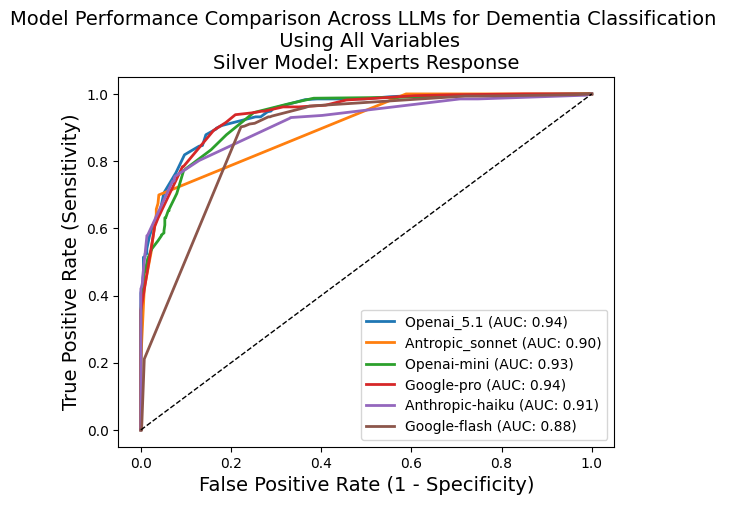

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate AUC for each model
gold_standard_model_d1 = d1_cog_impair_2cat
algorithm_name = "response_expert_score"

# gold_standard_model = langa_weir_2cat
valid_indices_v1_d1 = d1_pred[algorithm_name].notna() & gold_standard_model_d1.notna()
# valid_indices_v2_d1 = d1_v2['response_expert_score'].notna() & gold_standard_model_d1.notna()
valid_indices_v3_d1 = d1_v3['response_everything_score'].notna() & gold_standard_model_d1.notna()
gold_standard_v1_d1 = gold_standard_model_d1[valid_indices_v1_d1]
# gold_standard_v2_d1 = gold_standard_model_d1[valid_indices_v2_d1]
gold_standard_v3_d1 = gold_standard_model_d1[valid_indices_v3_d1]
auc_v1_d1 = roc_auc_score(gold_standard_v1_d1, d1_pred[algorithm_name][valid_indices_v1_d1])
# auc_v2_d1 = roc_auc_score(gold_standar_d2, d1_v2['response_expert_score'][valid_indices_v2_d1])
auc_v3_d1 = roc_auc_score(gold_standard_v3_d1, d1_v3['response_everything_score'][valid_indices_v3_d1])


gold_standard_model_d2 = d2_cog_impair_2cat
# gold_standard_model = langa_weir_2cat
valid_indices_v1_d2 = d2_pred[algorithm_name].notna() & gold_standard_model_d2.notna()
# valid_indices_v2_d2 = d2_v2['response_expert_score'].notna() & gold_standard_model_d2.notna()
valid_indices_v3_d2 = d2_v3['response_everything_score'].notna() & gold_standard_model_d2.notna()
gold_standard_v1_d2 = gold_standard_model_d2[valid_indices_v1_d2]
# gold_standard_v2_d2 = gold_standard_model_d2[valid_indices_v2_d2]
gold_standard_v3_d2 = gold_standard_model_d2[valid_indices_v3_d2]
auc_v1_d2 = roc_auc_score(gold_standard_v1_d2, d2_pred[algorithm_name][valid_indices_v1_d2])
# auc_v2_d2 = roc_auc_score(gold_standard_v2_d2, d2_v2['response_expert_score'][valid_indices_v2_d2])
auc_v3_d2 = roc_auc_score(gold_standard_v3_d2, d2_v3['response_everything_score'][valid_indices_v3_d2])

gold_standard_model_d3 = d3_cog_impair_2cat
# gold_standard_model = langa_weir_2cat
valid_indices_v1_d3 = d3_pred[algorithm_name].notna() & gold_standard_model_d3.notna()
# valid_indices_v2_d3 = d3_v2['response_expert_score'].notna() & gold_standard_model_d3.notna()
valid_indices_v3_d3 = d3_v3['response_everything_score'].notna() & gold_standard_model_d3.notna()
gold_standard_v1_d3 = gold_standard_model_d3[valid_indices_v1_d3]
# gold_standard_v2_d3 = gold_standard_model_d3[valid_indices_v2_d3]
gold_standard_v3_d3 = gold_standard_model_d3[valid_indices_v3_d3]
auc_v1_d3 = roc_auc_score(gold_standard_v1_d3, d3_pred[algorithm_name][valid_indices_v1_d3])
# auc_v2_d3 = roc_auc_score(gold_standard_v2_d3, d3_v2['response_expert_score'][valid_indices_v2_d3])
auc_v3_d3 = roc_auc_score(gold_standard_v3_d3, d3_v3['response_everything_score'][valid_indices_v3_d3])

gold_standard_model_d4 = d4_cog_impair_2cat
# gold_standard_model = langa_weir_2cat
valid_indices_v1_d4 = d4_pred[algorithm_name].notna() & gold_standard_model_d4.notna()
# valid_indices_v2_d4 = d4_v2['response_expert_score'].notna() & gold_standard_model_d4.notna()
valid_indices_v3_d4 = d4_v3['response_everything_score'].notna() & gold_standard_model_d4.notna()
gold_standard_v1_d4 = gold_standard_model_d4[valid_indices_v1_d4]
# gold_standard_v2_d4 = gold_standard_model_d4[valid_indices_v2_d4]
gold_standard_v3_d4 = gold_standard_model_d4[valid_indices_v3_d4]
auc_v1_d4 = roc_auc_score(gold_standard_v1_d4, d4_pred[algorithm_name][valid_indices_v1_d4])
# auc_v2_d4 = roc_auc_score(gold_standard_v2_d4, d4_v2['response_expert_score'][valid_indices_v2_d4])
auc_v3_d4 = roc_auc_score(gold_standard_v3_d4, d4_v3['response_everything_score'][valid_indices_v3_d4])

gold_standard_model_d5 = d5_cog_impair_2cat
# gold_standard_model = langa_weir_2cat
valid_indices_v1_d5 = d5_pred[algorithm_name].notna() & gold_standard_model_d5.notna()
# valid_indices_v2_d5 = d5_v2['response_expert_score'].notna() & gold_standard_model_d5.notna()
valid_indices_v3_d5 = d5_v3['response_everything_score'].notna() & gold_standard_model_d5.notna()
gold_standard_v1_d5 = gold_standard_model_d5[valid_indices_v1_d5]
# gold_standard_v2_d5 = gold_standard_model_d5[valid_indices_v2_d5]
gold_standard_v3_d5 = gold_standard_model_d5[valid_indices_v3_d5]
auc_v1_d5 = roc_auc_score(gold_standard_v1_d5, d5_pred[algorithm_name][valid_indices_v1_d5])
# auc_v2_d5 = roc_auc_score(gold_standard_v2_d5, d5_v2['response_expert_score'][valid_indices_v2_d5])
auc_v3_d5 = roc_auc_score(gold_standard_v3_d5, d5_v3['response_everything_score'][valid_indices_v3_d5])

gold_standard_model_d6 = d6_cog_impair_2cat
# gold_standard_model = langa_weir_2cat
valid_indices_v1_d6 = d6_pred[algorithm_name].notna() & gold_standard_model_d6.notna()
# valid_indices_v2_d6 = d6_v2['response_expert_score'].notna() & gold_standard_model_d6.notna()
valid_indices_v3_d6 = d6_v3['response_everything_score'].notna() & gold_standard_model_d6.notna()
gold_standard_v1_d6 = gold_standard_model_d6[valid_indices_v1_d6]
# gold_standard_v2_d6 = gold_standard_model_d6[valid_indices_v2_d6]
gold_standard_v3_d6 = gold_standard_model_d6[valid_indices_v3_d6]
auc_v1_d6 = roc_auc_score(gold_standard_v1_d6, d6_pred[algorithm_name][valid_indices_v1_d6])
# auc_v2_d6 = roc_auc_score(gold_standard_v2_d6, d6_v2['response_expert_score'][valid_indices_v2_d6])
auc_v3_d6 = roc_auc_score(gold_standard_v3_d6, d6_v3['response_everything_score'][valid_indices_v3_d6])

# Plot ROC AUC curves for each model
fig, ax_roc_curve = plt.subplots()

# Define color palette
# colors = {
#     'Antropic_Lasso': '#f4b6c2',        # light pink
#     # 'Antropic_Expert': '#ec729c',       # medium pink
#     'Antropic_Everything': '#c83369',   # dark pink
#     'Openai_Lasso': '#b3d9ff',          # light blue
#     # 'Openai_Expert': '#5fa8d3',         # medium blue
#     'Openai_Everything': '#1e6091',      # dark blue
#     'Google-pro_Lasso': "#f4d390",      # light orange-peach
#     # 'Google-pro_Expert': "#fba044",     # medium orange
#     'Google-pro_Everything': "#bf6a02",  # dark orange-brown 

# }

# Modified plotting function
def plot_roc_curve(ax, gold_standard, scores, label):
    fpr, tpr, _ = roc_curve(gold_standard, scores)
    auc_val = roc_auc_score(gold_standard, scores)
    ax.plot(fpr, tpr, label=f'{label} (AUC: {auc_val:.2f})', linewidth=2)

# Plot all ROC curves
# plot_roc_curve(ax_roc_curve, gold_standard_v1_d2, d2_pred[algorithm_name][valid_indices_v1_d2], 'Openai_5.1')
# plot_roc_curve(ax_roc_curve, gold_standard_v1_d1, d1_pred[algorithm_name][valid_indices_v1_d1], 'Anthropic_sonnet')
# plot_roc_curve(ax_roc_curve, gold_standard_v1_d6, d6_pred[algorithm_name][valid_indices_v1_d6], 'Openai-mini')
# plot_roc_curve(ax_roc_curve, gold_standard_v1_d3, d3_pred[algorithm_name][valid_indices_v1_d3], 'Google-pro')

# plot_roc_curve(ax_roc_curve, gold_standard_v1_d5, d5_pred[algorithm_name][valid_indices_v1_d5], 'Anthropic-haiku')
# plot_roc_curve(ax_roc_curve, gold_standard_v1_d4, d4_pred[algorithm_name][valid_indices_v1_d4], 'Google-flash')


plot_roc_curve(ax_roc_curve, gold_standard_v3_d2, d2_v3['response_everything_score'][valid_indices_v3_d2], 'Openai_5.1')
plot_roc_curve(ax_roc_curve, gold_standard_v3_d1, d1_v3['response_everything_score'][valid_indices_v3_d1], 'Antropic_sonnet')
plot_roc_curve(ax_roc_curve, gold_standard_v3_d6, d6_v3['response_everything_score'][valid_indices_v3_d6], 'Openai-mini')
plot_roc_curve(ax_roc_curve, gold_standard_v3_d3, d3_v3['response_everything_score'][valid_indices_v3_d3], 'Google-pro')

plot_roc_curve(ax_roc_curve, gold_standard_v3_d5, d5_v3['response_everything_score'][valid_indices_v3_d5], 'Anthropic-haiku')

plot_roc_curve(ax_roc_curve, gold_standard_v3_d4, d4_v3['response_everything_score'][valid_indices_v3_d4], 'Google-flash')


# Add diagonal reference
ax_roc_curve.plot([0, 1], [0, 1], 'k--', linewidth=1)

ax_roc_curve.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
ax_roc_curve.set_ylabel('True Positive Rate (Sensitivity)', fontsize=14)
ax_roc_curve.set_title('Model Performance Comparison Across LLMs for Dementia Classification \n Using All Variables\nSilver Model: Experts Response', fontsize=14)
ax_roc_curve.legend()
plt.show()
